<font size='9' color='red'>1. Análisis exploratorio de la base de datos</font>

Con anterioridad ya convertimos el archivo CSV delimitado por (;) a (,), y los miles (,) por (.). Este nuevo archivo lo vemos en la primera iteración con la base de datos en la ruta:

        data\1_iterim\adult_data_iter1.csv

=== REPORTE DE ANÁLISIS EXPLORATORIO ===

INFORMACIÓN GENERAL:
- Número de filas: 32,561
- Número de columnas: 15
- Uso de memoria: 3.73 MB

VALORES NULOS:
- Work_Class: 5.64% (1836 valores)
- Education_num: 0.09% (30 valores)
- Occupation: 5.66% (1843 valores)
- Capital_gain: 0.03% (10 valores)
- Capital_loss: 0.04% (12 valores)
- Hours_per_week: 0.05% (16 valores)
- Native_country: 1.79% (583 valores)

DUPLICADOS:
- Filas duplicadas: 23 (0.07%)

VALORES ATÍPICOS:
- Age: 143 outliers (0.44%)
- fnlwgt: 992 outliers (3.05%)
- Education_num: 1198 outliers (3.68%)
- Capital_gain: 2712 outliers (8.33%)
- Capital_loss: 1519 outliers (4.67%)
- Hours_per_week: 9003 outliers (27.65%)

VARIABLES CATEGÓRICAS:
- Work_Class: 8 valores únicos
- Education: 16 valores únicos
- Marital_status: 7 valores únicos
- Occupation: 14 valores únicos
- Relationship: 6 valores únicos
- Rice: 5 valores únicos
- Sex: 4 valores únicos
- Native_country: 41 valores únicos
- Class: 2 valores únicos


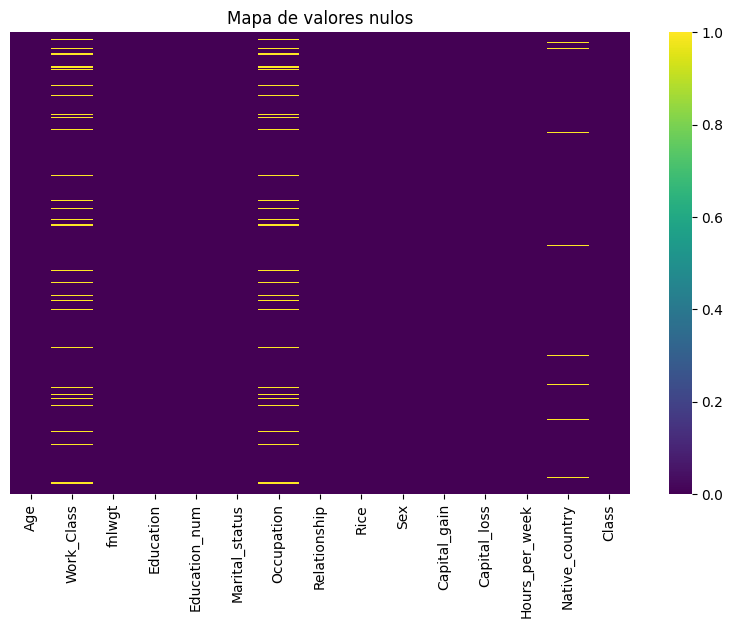

In [35]:
# Importamos los archivos y librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Añadir el directorio padre al path de Python
sys.path.append(str(Path(os.getcwd()).parent))

# Importar las funciones
from functions.analisisExp import analizar_dataset, imprimir_reporte

# Cargar los datos
df = pd.read_csv(r'..\data\1_iterim\adult_data_iter1.csv')


# Usar las funciones
analisis = analizar_dataset(df)

imprimir_reporte(analisis)

# Visualización
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Mapa de valores nulos')
plt.show()


<font color='red' size='7'>Observaciones de código.</font>

Podemos observar que el código llama a dos funciones. Estas funciones las podemos encontrar en el archivo ubicado en el directorio:

     functions\analisisExp.py

Observamos también el uso *sys.path*, el cual utilizaremos para importar dicho archivo que se encuentra en un directorio diferente a este. Utilizamos la librería para optimizar y facilitar la lectura del código, ya que otra forma sería por importación directa, añadiendo mas líneas de código. Una última forrma, sería teniendo los archivos en el mismo directorio, pero eso arruinaría el orden de los archivos.

---

<font color='red' size='7'>Observaciones de resultados.</font>

Basado en los resultados del análisis exploratorio, podemos identificar varios aspectos importantes que requieren atención en la limpieza de datos:

### 1. Valores Nulos:
Las columnas con mayor porcentaje de valores nulos son:

- Occupation (5.66%)
- Work_Class (5.64%)
- Native_country (1.79%)

Otras columnas tienen menos del 0.1% de valores nulos

### 3. Duplicados:
Hay 23 filas duplicadas (0.07% del total)

Este es un porcentaje bajo pero deberían eliminarse

### 4. Valores Atípicos (Outliers):

- Capital_gain: 8.33% (el más significativo)
- Capital_loss: 4.67%
- Education_num: 3.68%
- fnlwgt: 3.05%
- Age: 0.44%

### 5. Variables Categóricas:

- Class: Variable objetivo binaria (2 valores)
- Native_country: 41 categorías diferentes
- Sex: 4 categorías (podría indicar errores ya que típicamente serían 2-3)
- Rice: 5 categorías

<font size='9' color='red'>2. Limpieza del Dataframe</font>

Comenzamos eliminando los valores duplicados

In [36]:
df = df.drop_duplicates()
print("\nDimensiones después de eliminar duplicados:", df.shape)
print("Filas eliminadas:", 32561 - len(df))  # 32561 era el número original de filas


Dimensiones después de eliminar duplicados: (32538, 15)
Filas eliminadas: 23


# Manejo de valores nulos
## Verificamos los valores nulos por columna

In [37]:
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

                Age        fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32538.000000  3.253800e+04   32508.000000   32528.00000  32526.000000   
mean      38.592968  1.897795e+05      10.081918    1078.74213     87.397774   
std       13.691169  1.055551e+05       2.571827    7388.95767    403.166789   
min       17.000000  1.228500e+04       1.000000       0.00000      0.000000   
25%       28.000000  1.178285e+05       9.000000       0.00000      0.000000   
50%       37.000000  1.783545e+05      10.000000       0.00000      0.000000   
75%       48.000000  2.369928e+05      12.000000       0.00000      0.000000   
max      190.000000  1.484705e+06      16.000000   99999.00000   4356.000000   

       Hours_per_week  
count    32522.000000  
mean        40.439579  
std         12.347211  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Valores nulos por columna:
Age                  0
Work_Class  

## Valores categóricos
Para las columnas de tipo categóricas, rellenamos los valores con *"Unknow"*, columnas Education_num y Capital_loss se las imputarán con la mínima, mientras que para el resto tipo numérico, será con la media. Posteriormente visualizaremos los resultados.

In [38]:
# Manejar valores nulos en columnas categóricas
columnas_categoricas = ['Work_Class', 'Occupation', 'Native_country']
for col in columnas_categoricas:
    df[col] = df[col].fillna('Unknown')

# Ver los valores mínimos de estas columnas antes de la imputación
print("Valores mínimos actuales:")
print("Education_num mínimo:", df['Education_num'].min())
print("Capital_loss mínimo:", df['Capital_loss'].min())

# Ver cuántos valores nulos hay en cada columna
print("\nValores nulos antes de la imputación:")
print("Education_num nulos:", df['Education_num'].isnull().sum())
print("Capital_loss nulos:", df['Capital_loss'].isnull().sum())

# Imputar con el valor mínimo
df['Education_num'] = df['Education_num'].fillna(df['Education_num'].min())
df['Capital_loss'] = df['Capital_loss'].fillna(df['Capital_loss'].min())

# Verificar que se hayan imputado correctamente
print("\nValores nulos después de la imputación:")
print("Education_num nulos:", df['Education_num'].isnull().sum())
print("Capital_loss nulos:", df['Capital_loss'].isnull().sum())

# Manejar valores nulos en columnas numéricas
columnas_numericas = ['Capital_gain', 'Hours_per_week']
for col in columnas_numericas:
    df[col] = df[col].fillna(df[col].median())

# Verificar que no quedan valores nulos
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())

Valores mínimos actuales:
Education_num mínimo: 1.0
Capital_loss mínimo: 0.0

Valores nulos antes de la imputación:
Education_num nulos: 30
Capital_loss nulos: 12

Valores nulos después de la imputación:
Education_num nulos: 0
Capital_loss nulos: 0

Valores nulos después de la limpieza:
Age               0
Work_Class        0
fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Rice              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Class             0
dtype: int64


## Normalización del dataframe
Comenzamos tomando características descriptivas para ver como realizamos la normalización

Estadísticas descriptivas de variables numéricas:
                Age        fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32538.000000  3.253800e+04   32538.000000  32538.000000  32538.000000   
mean      38.592968  1.897795e+05      10.073545   1078.410597     87.365542   
std       13.691169  1.055551e+05       2.585377   7387.846311    403.095929   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178285e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783545e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369928e+05      12.000000      0.000000      0.000000   
max      190.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32538.000000  
mean        40.439363  
std         12.344178  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


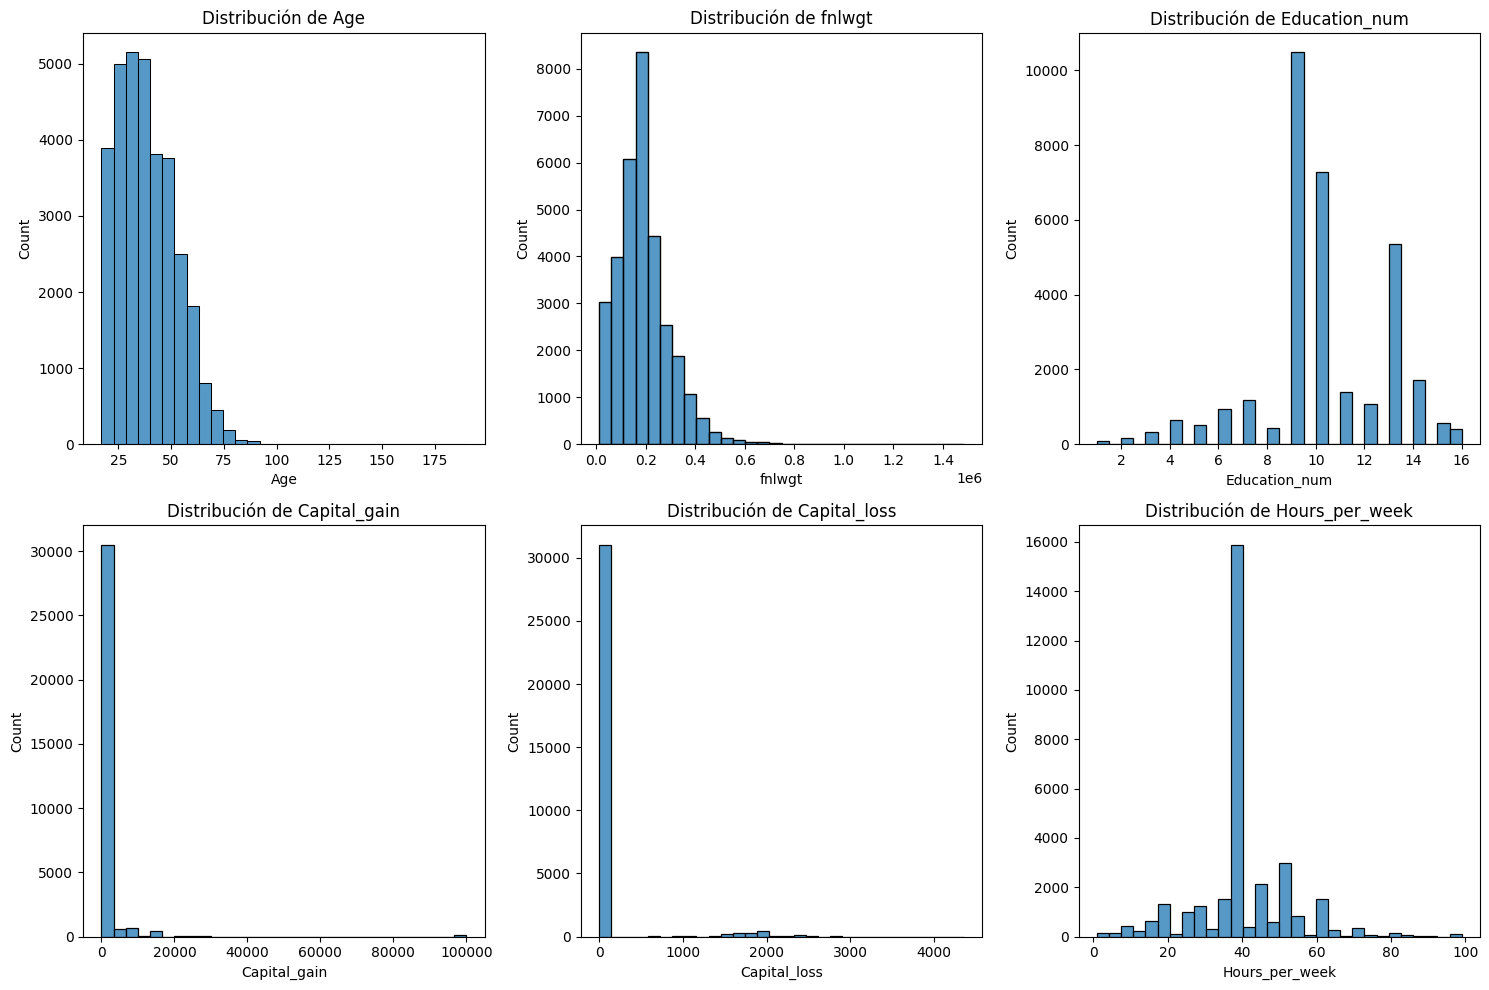

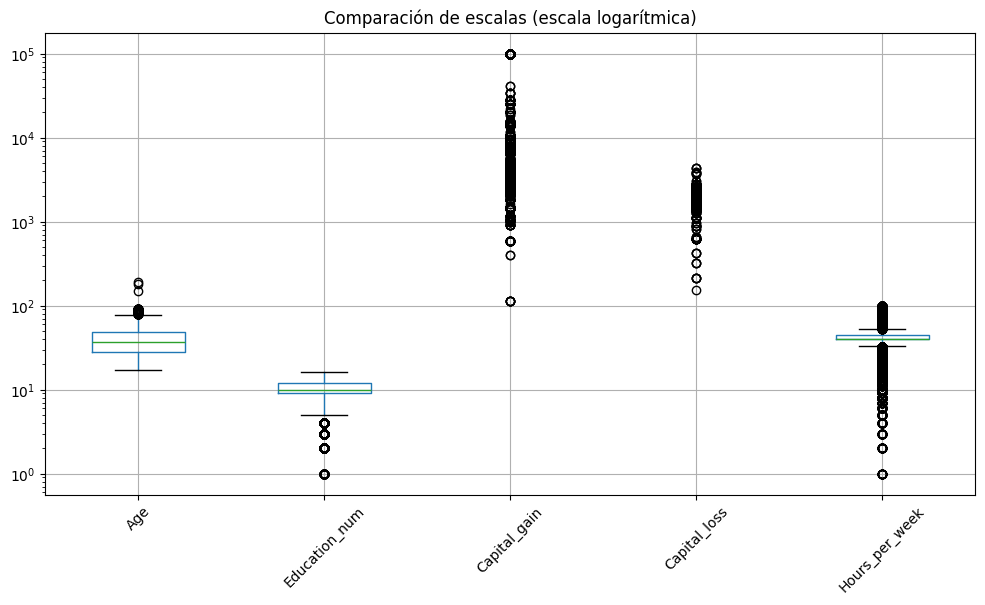

In [39]:
# 1. Primero, veamos las estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
print(df[['Age', 'fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].describe())

# 2. Visualizar la distribución de cada variable
plt.figure(figsize=(15, 10))
for i, columna in enumerate(['Age', 'fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[columna], bins=30)
    plt.title(f'Distribución de {columna}')
    plt.tight_layout()
plt.show()

# 3. Visualizar la diferencia en escalas usando un boxplot
plt.figure(figsize=(12, 6))
df.boxplot(['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'])
plt.yscale('log')
plt.title('Comparación de escalas (escala logarítmica)')
plt.xticks(rotation=45)
plt.show()

Basado en estas estadísticas podemos ver claramente que variables necesitan modificaciones:
## Normalización.

### fnlwgt:

- Media: ~189,779

- Max: 1,484,705

Necesita normalización por su gran escala

## Eliminación de Outliers.

### Age:

- Rango: 17-190

- Media: ~38.6

- Outlier en 190

## Discretización.

### Hours_per_week:

- Rango: 1-99

- Media: ~40.4

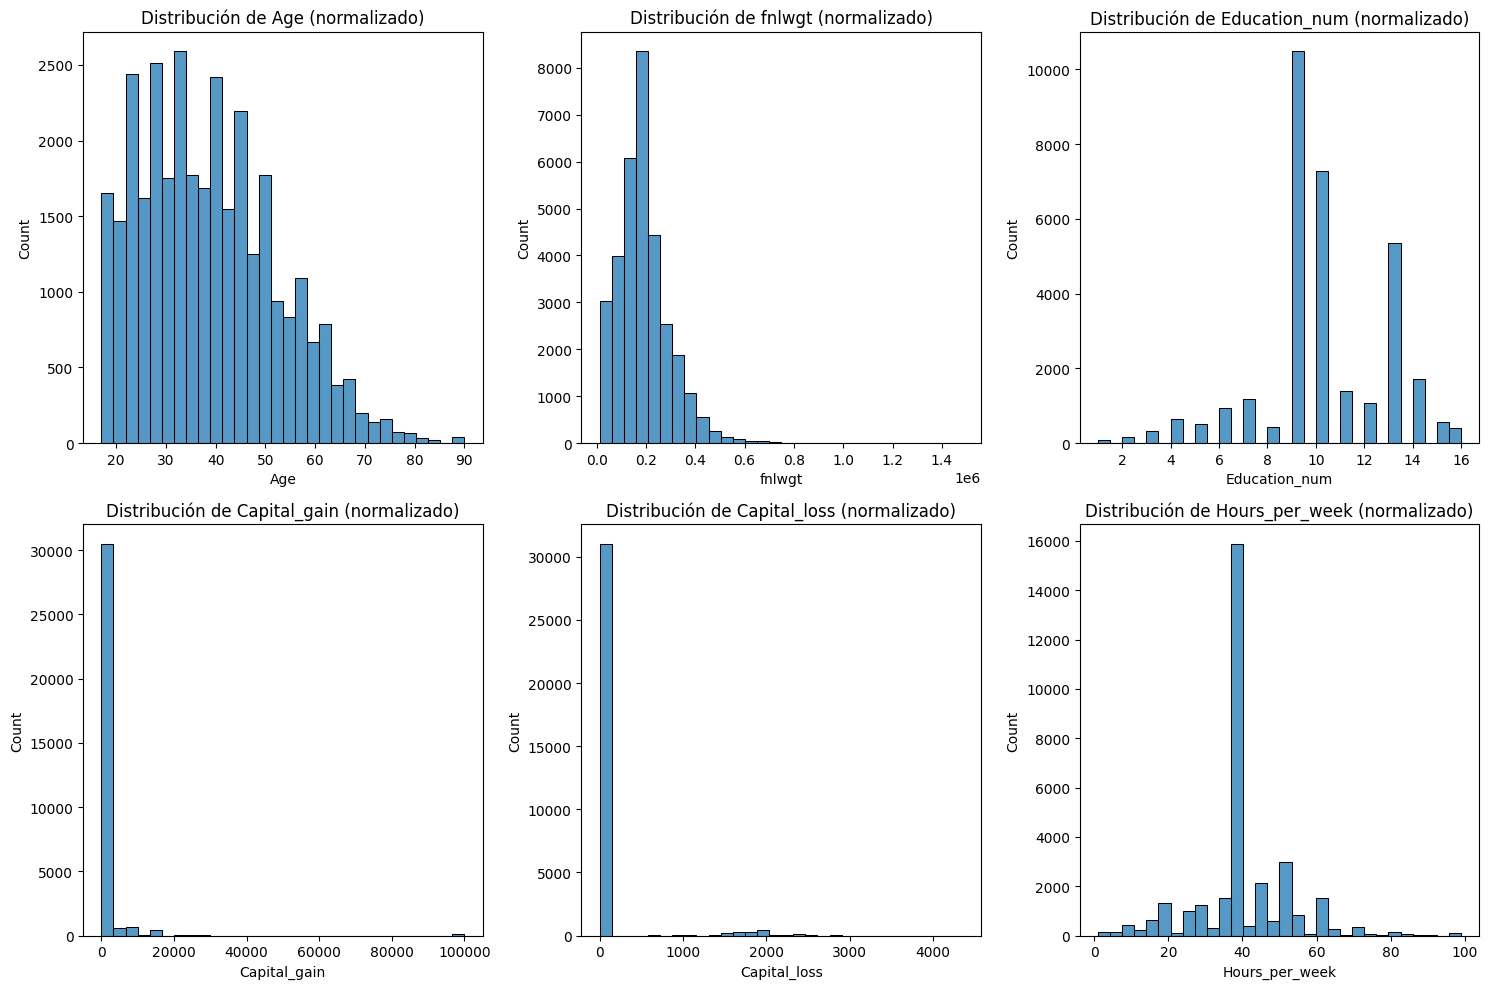

In [40]:
# Creamos una copia del dataframe para las transformaciones
df_norm = df.copy()

# 1. Normalizar fnlwgt usando MinMaxScaler
scaler = MinMaxScaler()
df_norm['fnlwgt_normalized'] = scaler.fit_transform(df_norm[['fnlwgt']])
    
# 2. Discretizar Hours_per_week
def categorize_hours(hours):
    if hours <= 10:
        return '1-10'
    elif hours <= 50:
        return '11-50'
    elif hours <= 70:
        return '51-70'
    else:
        return '71+'
    
df_norm['Hours_category'] = df_norm['Hours_per_week'].apply(categorize_hours)
    
# 3. Filtrar outliers de edad
df_norm = df_norm[df_norm['Age'] <= 90]

# Visualizar las distribuciones
plt.figure(figsize=(15, 10))
for i, columna in enumerate(['Age', 'fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_norm[columna], bins=30)
    plt.title(f'Distribución de {columna} (normalizado)')
plt.tight_layout()
plt.show()

In [41]:
print(df_norm.head())

   Age         Work_Class  fnlwgt   Education  Education_num  \
0   39          State-gov   77516   Bachelors           13.0   
1   50   Self-emp-not-inc   83311   Bachelors           13.0   
2   38            Private  215646     HS-grad            9.0   
3   53            Private  234721        11th            7.0   
4   28            Private  338409   Bachelors           13.0   

        Marital_status          Occupation    Relationship    Rice   Sex  \
0        Never-married        Adm-clerical   Not-in-family   White  Male   
1   Married-civ-spouse     Exec-managerial         Husband   White  Male   
2             Divorced   Handlers-cleaners   Not-in-family   White  Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black  Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black     F   

   Capital_gain  Capital_loss  Hours_per_week  Native_country   Class  \
0        2174.0           0.0            40.0   United-States   <=50K   
1           

## Atributos con valores inválidos:
Primero verificamos si existen atributos con valores inválidos

In [43]:
# Identificar columnas categóricas
categorical_columns = df_norm.select_dtypes(include=['object', 'category']).columns

# Análisis detallado de categorías por columna
for column in categorical_columns:
    print(f"\n{'='*50}")
    print(f"Categorías en la columna: {column}")
    print(f"{'='*50}")
    
    # Obtener valores únicos y sus frecuencias
    value_counts = df_norm[column].value_counts()
    
    # Crear un DataFrame con la información
    categories_df = pd.DataFrame({
        'Categoría': value_counts.index,
        'Frecuencia': value_counts.values,
        'Porcentaje': (value_counts.values / len(df_norm) * 100).round(2)
    })
    
    # Añadir números de índice para mejor referencia
    categories_df.index = range(1, len(categories_df) + 1)
    
    # Mostrar la información
    print(f"\nNúmero total de categorías únicas: {len(categories_df)}")
    print("\nDistribución de categorías:")
    print(categories_df.to_string())
    
    # Estadísticas adicionales
    print("\nEstadísticas:")
    print(f"Categoría más frecuente: {categories_df.iloc[0]['Categoría']} ({categories_df.iloc[0]['Porcentaje']}%)")
    print(f"Categoría menos frecuente: {categories_df.iloc[-1]['Categoría']} ({categories_df.iloc[-1]['Porcentaje']}%)")
    
    # Identificar categorías poco frecuentes (menos del 1%)
    rare_categories = categories_df[categories_df['Porcentaje'] < 1]
    if not rare_categories.empty:
        print(f"\nCategorías poco frecuentes (<1%):")
        print(rare_categories[['Categoría', 'Frecuencia', 'Porcentaje']].to_string())

# Resumen general
print("\n\nRESUMEN GENERAL")
print("="*50)
summary_df = pd.DataFrame({
    'Columna': categorical_columns,
    'Num_Categorías': [df_norm[col].nunique() for col in categorical_columns],
    'Categoría_Más_Común': [df_norm[col].mode()[0] for col in categorical_columns],
    'Categorías_Raras': [sum(df_norm[col].value_counts(normalize=True) < 0.01) for col in categorical_columns]
})

print("\nResumen de todas las columnas categóricas:")
print(summary_df.to_string())


Categorías en la columna: Work_Class

Número total de categorías únicas: 9

Distribución de categorías:
           Categoría  Frecuencia  Porcentaje
1            Private       22673       69.69
2   Self-emp-not-inc        2538        7.80
3          Local-gov        2093        6.43
4            Unknown        1836        5.64
5          State-gov        1298        3.99
6       Self-emp-inc        1116        3.43
7        Federal-gov         960        2.95
8        Without-pay          14        0.04
9       Never-worked           7        0.02

Estadísticas:
Categoría más frecuente:  Private (69.69%)
Categoría menos frecuente:  Never-worked (0.02%)

Categorías poco frecuentes (<1%):
       Categoría  Frecuencia  Porcentaje
8    Without-pay          14        0.04
9   Never-worked           7        0.02

Categorías en la columna: Education

Número total de categorías únicas: 16

Distribución de categorías:
        Categoría  Frecuencia  Porcentaje
1         HS-grad       10494    

Para las categorias "Sex" se encontraron 4, debiendo ser solo 2, por lo que procederemos con la estandarización de los registros, convirtiendo "F" a "Female" y "M" a "Male"

In [44]:
# Primero veamos la distribución actual
print("Distribución actual de valores en columna Sex:")
print(df_norm['Sex'].value_counts())

# Crear un diccionario de mapeo
sex_mapping = {
    'M': 'Male',
    'F': 'Female',
    'Male': 'Male',
    'Female': 'Female'
}

# Aplicar la transformación
df_norm['Sex'] = df_norm['Sex'].map(sex_mapping)

# Verificar la nueva distribución
print("\nNueva distribución después de la estandarización:")
print(df_norm['Sex'].value_counts())

# Verificar si quedó algún valor sin mapear (esto mostraría NaN si hubiera algún otro valor no considerado)
unmapped = df_norm[df_norm['Sex'].isna()]['Sex']
if len(unmapped) > 0:
    print("\n¡Atención! Se encontraron valores sin mapear:")
    print(unmapped.value_counts())
else:
    print("\nTodos los valores fueron mapeados correctamente.")

# Mostrar porcentajes de cada categoría
percentages = df_norm['Sex'].value_counts(normalize=True) * 100
print("\nDistribución porcentual:")
for category, percentage in percentages.items():
    print(f"{category}: {percentage:.2f}%")

Distribución actual de valores en columna Sex:
Sex
Male      21754
Female    10749
M            20
F            12
Name: count, dtype: int64

Nueva distribución después de la estandarización:
Sex
Male      21774
Female    10761
Name: count, dtype: int64

Todos los valores fueron mapeados correctamente.

Distribución porcentual:
Male: 66.92%
Female: 33.08%


<font size='9' color='red'>3. Guardado de base de datos</font>

Guardamos la base de datos en un archivo CSV nuevo en el directorio: 

        data\2_processed

In [48]:
# Obtener el directorio actual donde está el notebook
current_dir = os.getcwd()

# Subir un nivel para llegar a la raíz del proyecto
project_root = os.path.dirname(current_dir)

# Construir la ruta completa
output_file = os.path.join(project_root, "data", "2_processed", "processed_db.csv")

print(f"Intentando guardar en: {output_file}")

try:
    # Verificar si el directorio existe
    output_dir = os.path.dirname(output_file)
    if not os.path.exists(output_dir):
        print(f"Creando directorio: {output_dir}")
        os.makedirs(output_dir, exist_ok=True)
    
    # Guardar el DataFrame
    df_norm.to_csv(output_file, index=False, sep=',')
    
    # Verificar que el archivo se guardó correctamente
    if os.path.exists(output_file):
        print(f"Archivo guardado exitosamente en: {output_file}")
        print(f"Tamaño del archivo: {os.path.getsize(output_file) / 1024:.2f} KB")
        print(f"Número de registros guardados: {len(df_norm)}")
    else:
        print("¡Error! El archivo no se guardó correctamente.")

except Exception as e:
    print(f"Error al guardar el archivo: {str(e)}")
    print(f"Directorio actual: {os.getcwd()}")
    
# Mostrar información adicional para debugging
print("\nInformación de rutas:")
print(f"Directorio actual: {current_dir}")
print(f"Directorio raíz del proyecto: {project_root}")
print(f"Ruta completa del archivo: {output_file}")

Intentando guardar en: c:\Users\facun\OneDrive\Documentos\Ciencia de Datos e IA\2do Año\Minería de Datos\C9 - Minería de Datos\Video\actInt_9\data\2_processed\processed_db.csv
Archivo guardado exitosamente en: c:\Users\facun\OneDrive\Documentos\Ciencia de Datos e IA\2do Año\Minería de Datos\C9 - Minería de Datos\Video\actInt_9\data\2_processed\processed_db.csv
Tamaño del archivo: 4814.95 KB
Número de registros guardados: 32535

Información de rutas:
Directorio actual: c:\Users\facun\OneDrive\Documentos\Ciencia de Datos e IA\2do Año\Minería de Datos\C9 - Minería de Datos\Video\actInt_9\Notebooks
Directorio raíz del proyecto: c:\Users\facun\OneDrive\Documentos\Ciencia de Datos e IA\2do Año\Minería de Datos\C9 - Minería de Datos\Video\actInt_9
Ruta completa del archivo: c:\Users\facun\OneDrive\Documentos\Ciencia de Datos e IA\2do Año\Minería de Datos\C9 - Minería de Datos\Video\actInt_9\data\2_processed\processed_db.csv
